In [1]:
import math
import random

class Cowan:
    def __init__(self, N, h, ws, w0, alpha, beta):
        self.N = N
        self.h = h
        self.ws = ws
        self.w0 = w0
        self.alpha = alpha
        self.beta = beta
        S0 = self.fsigma()
        self.k = round(S0 * N)
        self.l = round(S0 * N)
        sigma = (self.k + self.l) / (2.0 * N)
        delta = (self.k - self.l) / (2.0 * N)
        s = self.w0 * sigma + self.ws * delta + self.h
        self.ftmp = 2 * (1 - sigma) * (0 if s <= 0 else self.beta * math.tanh(s))

    def fsigma(self):
        s1 = 0
        s2 = 1
        while abs(s2 - s1) > 1e-12:
            sm = (s1 + s2) / 2
            s = self.w0 * sm + self.h
            rate = 0 if s <= 0 else self.beta * math.tanh(s)
            fm = (1 - sm) * rate - self.alpha * sm
            if fm < 0:
                s2 = sm
            else:
                s1 = sm
        return (s1 + s2) / 2

    def dinamica(self, step):
        nhit = 0
        t = 0
        while t < step:
            sigma = (self.k + self.l) / (2.0 * self.N)
            delta = (self.k - self.l) / (2.0 * self.N)
            s = self.w0 * sigma + self.ws * delta + self.h
            rate = 0 if s <= 0 else self.beta * math.tanh(s)
            rae = (self.N - self.k) * rate
            rai = (self.N - self.l) * rate
            rse = self.k * self.alpha
            rsi = self.l * self.alpha
            rtot = rae + rai + rse + rsi
            dt = -math.log((1.0 + random.random()) / (2.0 + random.uniform(0, 1))) / rtot
            if t + dt > step:
                break
            t += dt
            xtmp = rtot * (1.0 + random.random()) / (2.0 + random.uniform(0, 1))
            if xtmp < rae:
                self.k += 1
                nhit += 1
            elif xtmp < rae + rai:
                self.l += 1
                nhit += 1
            elif xtmp < rae + rai + rse:
                self.k -= 1
            else:
                self.l -= 1
        sigma = (self.k + self.l) / (2.0 * self.N)
        delta = (self.k - self.l) / (2.0 * self.N)
        s = self.w0 * sigma + self.ws * delta + self.h
        self.ftmp = 2 * (1 - sigma) * (0 if s <= 0 else self.beta * math.tanh(s))
        return self.ftmp


def main():
    N = 100000
    ws = 13.8
    w0 = 0.1
    h = 1e-6
    alpha = 0.1
    beta = 1
    delta = 0.1
    cmin = 1000
    cmax = 10000

    X = Cowan(N, h, ws, w0, alpha, beta)

    imax = 40
    del_vals = [int(1.122 ** i) for i in range(1, imax + 1)]
    tmax = del_vals[-1]

    B = 0
    B2 = 0
    C = [0] * imax

    for c in range(1, cmax + 1):
        f0 = X.ftmp
        i = 0
        for t in range(1, tmax + 1):
            X.dinamica(delta)
            if c > cmin:
                ftmp = X.ftmp
                B += ftmp
                B2 += ftmp ** 2
                if t in del_vals:
                    i += 1
                    C[i - 1] += f0 * ftmp

        if c % 1000 == 0:
            print(f"c={c}/{cmax}")

    bm = B / (tmax * (cmax - cmin))
    b2m = B2 / (tmax * (cmax - cmin))
    d_arr = []
    arr = []
    for i, d in enumerate(del_vals):
        # print(f"{d:12} {((C[i] / (cmax - cmin)) - bm ** 2) / (b2m - bm ** 2):12g}")
        d_arr.append(d)
        arr.append(((C[i] / (cmax - cmin)) - bm ** 2) / (b2m - bm ** 2))
    return d_arr, arr

if __name__ == "__main__":
    d_arr, arr = main()

c=1000/10000
c=2000/10000
c=3000/10000
c=4000/10000
c=5000/10000
c=6000/10000
c=7000/10000
c=8000/10000
c=9000/10000
c=10000/10000


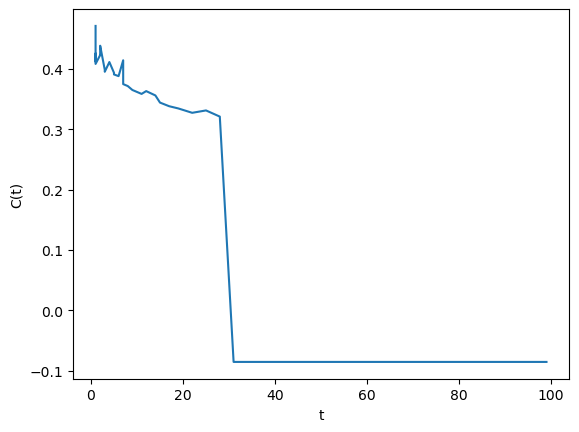

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(d_arr, arr)
# plt.xscale("log")
plt.xlabel("t")
plt.ylabel("C(t)")
plt.show()